# Hotel Booking Cancellation Prediction - Enhanced Model Development

## Data Overview

A hotel operates two branches: a "City Hotel" located in the state's capital and a "Resort Hotel" near the coastal area. The provided dataset in CSV format encompasses reservations for these hotels with a wide array of attributes, offering a comprehensive view of each booking's characteristics.

### Dataset Attributes:

- **hotel**: Type of hotel ("City Hotel" or "Resort Hotel").
- **is_canceled**: Indicates if a booking was canceled (`1`) or not (`0`).
- **lead_time**: Days between the booking date and arrival date.
- **arrival_date_year**: Year of arrival.
- **arrival_date_month**: Month of arrival (January to December).
- **arrival_date_week_number**: Week number of arrival.
- **arrival_date_day_of_month**: Day of the month of arrival.
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked.
- **stays_in_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked.
- **adults**, **children**, **babies**: Number of adults, children, and babies, respectively.
- **meal**: Type of meal booked.
- **country**: Guest's country of origin (ISO 3155–3:2013 format).
- **market_segment**: Market segment designation.
- **distribution_channel**: Booking distribution channel.
- **is_repeated_guest**: Indicates if the booking was made by a repeated guest (`1`) or not (`0`).
- **previous_cancellations**: Number of previous bookings canceled by the customer before the current booking.
- **previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer before the current booking.
- **reserved_room_type**, **assigned_room_type**: Codes for room types booked and assigned, respectively.
- **booking_changes**: Number of changes made to the booking from the time it was entered into the PMS until check-in or cancellation.
- **deposit_type**: Indicates if the customer made a deposit to guarantee the booking.
- **agent**, **company**: ID of the travel agency and company that made the booking.
- **days_in_waiting_list**: Days the booking was on the waiting list before being confirmed.
- **customer_type**: Type of booking.
- **adr**: Average daily rate.
- **required_car_parking_spaces**: Number of car parking spaces requested by the guest.
- **total_of_special_requests**: Number of special requests made by the guest.
- **reservation_status**: Last status of the booking.
- **reservation_status_date**: Date of the last status update.
- **name**, **email**, **phone**, **credit_card**: Customer's name, email, phone number, and last four digits of the credit card.

The dataset for this analysis is sourced from `hotel_bookings_training.csv`, which is a subset of a larger dataset available on Kaggle. Further information about the dataset's origin can be explored [here](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

### Focus on Recall

In this analysis, beyond the conventional metric of accuracy, the principal concern is the comprehensive identification of potential booking cancellations. The client prioritizes preventive measures and values the act of confirming bookings with customers — a practice seen as both acceptable and indicative of attentive customer service, even if it includes contacting those who might not eventually cancel their reservations. This emphasis on recall ensures that predictive efforts align with the client's strategy to mitigate last-minute cancellations through proactive engagement.


## Model enhancement

### Index

- Introduction of the `room_type_match` Variable
- Incorporation of `lead_time` and `lead_time_category` (Integration of Numeric `lead_time` into the Model Pipeline, Addition of `lead_time_category`)
- Introduction of `lead_time_repeated_guest_interaction`
- Inclusion of Interaction Between `lead_time` and `customer_type`
- Inclusion of Interactions Between `lead_time` and Categorical Variables `market_segment` and `arrival_date_month`
- Exploratory Analysis of `days_in_waiting_list`
- Previous Cancellations: Variables `has_canceled_before` and `interaction_has_canceled_lead_time`
- Cross-validation
- Hyperparameter Tuning
- Model Improvement

### Enhancing Model Performance with Key Variables and Interactions

#### - Introduction of the `room_type_match` Variable

Introduction of the `room_type_match` variable to examine if discrepancies between reserved and assigned room types increase cancellation likelihood. This binary variable slightly improved recall in model validation from 0.7176 to 0.7244, and accuracy and recall in model testing from 0.8146 and 0.7607 to 0.8155 and 0.7615 respectively, indicating a modest yet positive effect on the model's predictive accuracy.

#### - Incorporation of `lead_time` and `lead_time_category`

Incorporation of `lead_time` and `lead_time_category`, and their integration into the model pipeline.

Incorporation of `lead_time`

Including `lead_time` directly as a numeric variable and in a categorized form significantly enhanced performance metrics during model validation and testing. For instance, after including `lead_time`, precision in model testing improved from 0.8146 to 0.8498, and recall from 0.7607 to 0.8183, demonstrating** its substantial impact on improving model precision and recall.**

Incorporation of `lead_time_category`

Initially, with the direct numerical inclusion of `lead_time`, model validation yielded a precision of 0.8413 and recall of 0.7462, and model testing showed a precision of 0.8498 and recall of 0.8183.

Following the addition of `lead_time_category` (categorized with one-hot encoding), the precision in model validation slightly decreased to 0.8390 and recall to 0.7424.

In model testing, precision adjusted to 0.8493 and recall to 0.8193.

From these outcomes, it's evident that:

The precision experienced a slight dip in model validation when transitioning from a direct numeric `lead_time` to a categorized `lead_time_category`. This suggests that while categorization captures useful information on anticipation ranges, precision might slightly benefit more from including `lead_time` as a continuous numeric value.
A slight decrease in recall during model validation was observed with the categorized variable, indicating the model with numeric `lead_time` was marginally better at identifying all relevant instances of cancellations.
In model testing, both precision and recall remained relatively stable with minimal changes upon introducing `lead_time_category`. This indicates that for unseen data, both numeric and categorized representations of `lead_time` offer comparable performance, with a slight advantage for the direct numeric version in terms of precision.

### - Incorporation of `lead_time_repeated_guest_interaction`
The addition of the `lead_time_repeated_guest_interaction` interaction variable allows for an analysis of its impact on model performance in both validation and testing phases:

**Before Interaction Inclusion:**
- Model Validation: Precision: 0.8390, Recall: 0.7424
- Model Testing: Precision: 0.8493, Recall: 0.8193

**After Interaction Inclusion:**
- Model Validation: Precision: 0.8409, Recall: 0.7352
- Model Testing: Precision: 0.8484, Recall: 0.8237

**Model Validation Insights:**
The integration of the interaction variable slightly improved precision (from 0.8390 to 0.8409) but decreased recall (from 0.7424 to 0.7352). This indicates that while the model has marginally enhanced its ability to correctly identify both cancelled and non-cancelled bookings, its capability to recognize all relevant instances of cancellations has slightly declined.

**Model Testing Insights:**
In the testing set, precision remained relatively stable with a slight decrease (from 0.8493 to 0.8484), whereas recall saw a significant increase (from 0.8193 to 0.8237). This demonstrates that **the inclusion of the interaction variable boosts the model's ability to identify cancellations among all potential cancellations in unseen data.** This is a positive outcome, particularly for practical applications where correctly identifying cancellations is crucial.

### - Incorporation of `lead_time` interaction with `customer_type`
**Before Interaction Inclusion:**
- Model Validation: Precision: 0.8409, Recall: 0.7352
- Model Testing: Precision: 0.8484, Recall: 0.8237

**After Interaction Inclusion:**
- Model Validation: Precision: 0.8423, Recall: 0.7468
- Model Testing: Precision: 0.8499, Recall: 0.8245

**Impact Analysis:**
**Model Validation:** The integration of interaction variables led to an increase in precision from 0.8409 to 0.8423 and in recall from 0.7352 to 0.7468. This suggests that the model has **become more effective at correctly identifying bookings **that will be canceled and has **improved in recognizing all relevant instances of cancellations**.

**Model Testing:** In the test set, precision slightly increased from 0.8484 to 0.8499, and recall also improved from 0.8237 to 0.8245. These modest improvements indicate that the added interaction variables have positively contributed to the model's ability to predict cancellations in unseen data, enhancing both accuracy and completeness.

### - Incorporation of `lead_time` interactions with categorical variables `market_segment` and `arrival_date_month`
**Before New Interaction Inclusion:**
- Model Validation: Precision: 0.8423, Recall: 0.7468
- Model Testing: Precision: 0.8499, Recall: 0.8245

**After New Interaction Inclusion:**
- Model Validation: Precision: 0.8549, Recall: 0.7633
- Model Testing: Precision: 0.8624, Recall: 0.8387

**Impact Analysis:**
**Overall Precision Improvement:** Both in validation and testing, precision increased significantly (from 0.8423 to 0.8549 in validation, and from 0.8499 to 0.8624 in testing). This indicates that the model has improved at correctly identifying both canceled and non-canceled bookings, thanks to the incorporation of interaction variables.

**Recall Improvement with Minor Trade-off in Validation:** In testing, recall also notably improved (from 0.8245 to 0.8387), meaning the model has become more effective at identifying all relevant instances of cancellations. However, in validation, although recall improved (from 0.7468 to 0.7633), the increase is less pronounced compared to the improvement in testing.

### - Analysis of the `days_in_waiting_list` variable

- Analysis of the `days_in_waiting_list` variable revealed that a majority of bookings had zero waiting days, indicating limited variability and predictive power for this variable. Therefore, it was excluded from further analysis and modeling due to its** minimal potential **for enhancing model performance significantly.

Detailed analysis of `days_in_waiting_list` through scatter plots has identified different "groups" or data segments based on the number of days reservations remained on the waiting list before confirmation. A significant concentration of cases was observed in both canceled and non-canceled reservations with `days_in_waiting_list` between 0 and 126, indicating most reservations are confirmed either without a waiting period or with a relatively short wait. Additionally, less dense waiting segments were identified between 150 and 260 days, and some values that might be considered outliers, specifically reservations with more than 300 days of waiting.

Despite these segments, the dominance of confirmed reservations without waiting (value = 0) suggests `days_in_waiting_list` carries limited variability for most observations. Consequently, this variable has been decided not to be included in further analysis or predictive modeling due to its limited potential to significantly improve model metrics. This decision is based on the consideration that any improvement from analyzing `days_in_waiting_list` would be marginal in the context of the entire sample.

Suggested Segmentation for Future Analysis:
To explore the relationship between `days_in_waiting_list` and cancellations in detail in the future, especially to understand how different waiting periods might affect customer experience or reservation management, the following segmentation is proposed for detailed analysis:

No Wait: days_in_waiting_list = 0.
Short Wait: From 1 to 126 days.
Medium Wait: From 127 to 260 days.
Long Wait: More than 260 days, adjusting for or excluding outliers.

This segmented approach would allow for more granular analysis, potentially uncovering specific insights on how waitlist management and customer service could be optimized to reduce cancellations or improve customer satisfaction.

### - Examination of previous cancellations through variables `has_canceled_before` and `interaction_has_canceled_lead_time`

Examination of previous cancellations through variables like `has_canceled_before` and `interaction_has_canceled_lead_time`. These did not result in significant improvements and were removed from the pipeline to avoid compromising the metrics. The model's performance worsened, which could indicate these variables introduce noise or potentially lead to overfitting.

Model Validation

Previous Values:
Precision: 0.8549
Recall: 0.7633

Current Values:
Precision: 0.8584
Recall: 0.7636

A slight improvement in precision was observed, while recall remained virtually unchanged. This indicates that including `has_canceled_before` and the interaction between `has_canceled_before` and `lead_time` has made the model slightly more accurate in correctly identifying cancellations without compromising its ability to recognize all relevant instances of cancellations.

Model Testing
Previous Values:
Precision: 0.8624
Recall: 0.8387

New Values:
Precision: 0.8582
Recall: 0.8379

For the test set, a minor decrease in both precision and recall was noted. This could imply that while** the new variables offer some predictive value, they might also introduce noise or not be as generalizable to unseen data as expected.**

Conclusion
The inclusion of `has_canceled_before` and its interaction with `lead_time` demonstrates an improvement in precision during validation, which is positive. However, the slight decrease in precision and recall in the test set suggests it's essential to balance the addition of new variables (and their interactions) against the risk of overfitting or introducing noise into the model.

These results highlight the importance of an iterative modeling process, experimenting with different features and assessing their impact on model performance. Improvements in one dataset might not directly translate to others, an important consideration when aiming to generalize the model for new data.

### - Model Enhancement: cross-validation and hyperparameter tuning

Cross-validation and hyperparameter tuning were explored to further refine the model. This iterative process underscores the importance of experimenting with different features and assessing their impact on model performance. Sometimes, improvements in one dataset may not directly translate to enhancements in others, highlighting the need for a thoughtful approach to generalizing the model for new data.

##Getting started

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Variable for your file path
file_path = 'data/hotel_bookings_training.csv' #or the Google Drive path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

hotel_bookings = pd.read_csv(file_path)

from sklearn.model_selection import train_test_split

In [5]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119190 entries, 0 to 119189
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119190 non-null  object 
 1   is_canceled                     119190 non-null  int64  
 2   lead_time                       119190 non-null  int64  
 3   arrival_date_year               119190 non-null  int64  
 4   arrival_date_month              119190 non-null  object 
 5   arrival_date_week_number        119190 non-null  int64  
 6   arrival_date_day_of_month       119190 non-null  int64  
 7   stays_in_weekend_nights         119190 non-null  int64  
 8   stays_in_week_nights            119190 non-null  int64  
 9   adults                          119190 non-null  int64  
 10  children                        119186 non-null  float64
 11  babies                          119190 non-null  int64  
 12  meal            

In [6]:
# Personal information of customers removal
hotel_bookings = hotel_bookings.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [7]:
hotel_bookings.sample(10)
hotel_bookings["market_segment"].sample(50)
hotel_bookings["customer_type"].sample(25)

5124            Transient
6030      Transient-Party
39135     Transient-Party
90126           Transient
79966           Transient
8935            Transient
24625           Transient
52744           Transient
42861           Transient
88434           Transient
110233          Transient
54367           Transient
39108     Transient-Party
71506           Transient
50817           Transient
117541    Transient-Party
78904           Transient
113688          Transient
49593           Transient
57194           Transient
45258           Transient
43299           Transient
50490           Transient
26971           Transient
84723     Transient-Party
Name: customer_type, dtype: object

##EDA

In [8]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=f1a977aa3df1b8701f3d39c7b6605f13cb220080b27e22139eaed169ce99f0cb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [9]:
from ydata_profiling import ProfileReport # Previously pandas_profiling # Creating a report on the data in an HTML file

In [10]:
profile = ProfileReport(hotel_bookings, title="Pandas Profiling Report")

In [11]:
!pip install matplotlib
!pip install --upgrade Pillow
import matplotlib.pyplot as plt
profile.to_file("data/bookings_profile.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#!ls

In [ ]:
from google.colab import files
files.download('data/bookings_profile.html')

### Avoiding Data Leakage and Handling Imbalanced Data

Splitting the dataset prior to applying any transformations is essential to ensure that the model training and evaluation phases are realistic and unbiased. This section explains the strategy for avoiding data leakage and addresses the challenge of imbalanced data.

## Data Leakage

The variable `reservation_status` reflects the outcome of a reservation, mirroring the `is_canceled` status. Including it as an input variable introduces data leakage, potentially inflating model performance metrics without real-world applicability. To maintain model integrity, this variable, along with any related variables, should be excluded from the dataset.

Understanding Data Leakage
Data leakage can occur in several ways, including but not limited to:

Forgetting to hide certain information, such as personal data, which should not be available to the model during training.
Using information from the test/validation set to train the model.
Data leakage leads to models learning patterns they shouldn't, resulting in deceptively high performance when evaluated on the same data but potentially much poorer performance on new or unseen data. This underscores the importance of careful data handling and model evaluation strategies to ensure the model's real-world applicability and reliability.

In [12]:
# Avoiding data leakage
hotel_bookings = hotel_bookings.drop(['reservation_status', 'reservation_status_date'], axis=1)

##Extracting the Target Variable

In [13]:
is_canceled = hotel_bookings['is_canceled'].copy()
hotel_data = hotel_bookings.drop(['is_canceled'], axis=1)

# Feature Engineering and Model Enhancement Initiatives

#### Creating a New Feature `room_type_match` based on the comparison of `reserved_room_type` and `assigned_room_type`

To enhance the model's predictive accuracy, a derived variable, `room_type_match`, is introduced. This feature aims to determine whether a discrepancy between the type of room reserved (`reserved_room_type`) and the type of room actually assigned (`assigned_room_type`) affects cancellation rates. The underlying hypothesis suggests that not receiving the initially requested room might impact customer satisfaction and, consequently, increase the likelihood of reservation cancellation.

A binary feature, `room_type_match`, is established, assigning a value of 1 when the reserved and assigned room types match, and 0 when they do not. This approach provides insight into whether receiving a different room from what was booked influences the cancellation decision.

In [14]:
# Generating the 'Room Type Match' Feature by Comparing 'Reserved Room Type' and 'Assigned Room Type'
hotel_bookings['room_type_match'] = (hotel_bookings['reserved_room_type'] == hotel_bookings['assigned_room_type']).astype(int)

In [15]:
hotel_data['room_type_match'] = hotel_bookings['room_type_match']

### Enhancing Model Predictions through Lead Time Analysis and Feature Interactions

#### Including Lead Time as a Numeric Variable


In [16]:
hotel_data['lead_time'] = hotel_bookings['lead_time']

#### Creating a new column with lead time categories


In [17]:
hotel_bookings['lead_time_category'] = pd.cut(hotel_bookings['lead_time'],
                                              bins=[-1, 30, 180, float('inf')],
                                              labels=['Short Term', 'Medium Term', 'Long Term'])

In [18]:
hotel_data['lead_time_category'] = hotel_bookings['lead_time_category']

#### Generating interactions between lead time and other variables to explore their relationships


#### Interaction of `lead_time` with `is_repeated_guest`


In [19]:
hotel_data['lead_time_repeated_guest_interaction'] = hotel_data['lead_time'] * hotel_data['is_repeated_guest']

#### Binary variables for each `customer_type` category through One-Hot Encoding

#### Interaction between lead time and each of these new binary columns

#### Generating interaction features between `lead_time` and newly created customer type binary columns

In [21]:
# One-Hot Encoding Application
# Utilizing One-Hot Encoding to transform 'customer_type' into binary columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Setting 'sparse=False' to obtain a dense matrix directly
customer_type_encoded = encoder.fit_transform(hotel_data[['customer_type']])

# Generating Column Names from Encoder Categories
# Creating descriptive column names based on the 'customer_type' categories

categories = encoder.categories_[0]
new_cols = [f"customer_type_{cat}" for cat in categories]

# Incorporating New Columns into Data
# Adding encoded customer type columns to the dataset

for i, col in enumerate(new_cols):
    hotel_data[col] = customer_type_encoded[:, i]

# Interaction Feature Creation
# Generating interaction features between 'lead_time' and newly created customer type binary columns

for col in new_cols:
    hotel_data[f'lead_time_{col}_interaction'] = hotel_data['lead_time'] * hotel_data[col]

interaction_features = [f'lead_time_customer_type_{cat}_interaction' for cat in encoder.categories_[0]]

In [22]:
# Column Name Verification in Dataset
# Reviewing the column names in the hotel_data to ensure inclusion of new features

print(hotel_data.columns)

# Previewing Initial Rows for Confirmation
# Displaying the first few rows to verify the presence of newly added columns

print(hotel_data.head())


Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'room_type_match', 'lead_time_category',
       'lead_time_repeated_guest_interaction', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party',
       'lead_time_customer_type_Contract_interaction',
       'lead_time_customer_type_Group_interaction',
       'lead_time_customer_type_Transient_interaction',
  

#### Creating Interaction Variables with `market_segment` and `arrival_date_month`

In [23]:
# Applying One-Hot Encoding to 'market_segment' and 'arrival_date_month' and Adding New Columns to 'hotel_data'
# Implementing One-Hot Encoding for 'market_segment'
market_segment_encoded = encoder.fit_transform(hotel_data[['market_segment']])
market_segment_categories = encoder.categories_[0]
market_segment_cols = [f"market_segment_{cat}" for cat in market_segment_categories]

# Implementing One-Hot Encoding for 'arrival_date_month'
month_encoded = encoder.fit_transform(hotel_data[['arrival_date_month']])
month_categories = encoder.categories_[0]
month_cols = [f"arrival_date_month_{cat}" for cat in month_categories]

# Adding the new columns to 'hotel_data'
for i, col in enumerate(market_segment_cols + month_cols):
    if i < len(market_segment_cols):
        hotel_data[col] = market_segment_encoded[:, i]
    else:
        hotel_data[col] = month_encoded[:, i - len(market_segment_cols)]

# Creating Interaction Variables with 'market_segment'
for col in market_segment_cols:
    hotel_data[f'lead_time_{col}_interaction'] = hotel_data['lead_time'] * hotel_data[col]

# Creating Interaction Variables with 'arrival_date_month'
for col in month_cols:
    hotel_data[f'lead_time_{col}_interaction'] = hotel_data['lead_time'] * hotel_data[col]

#### Exploratory Analysis of `days_in_waiting_list`

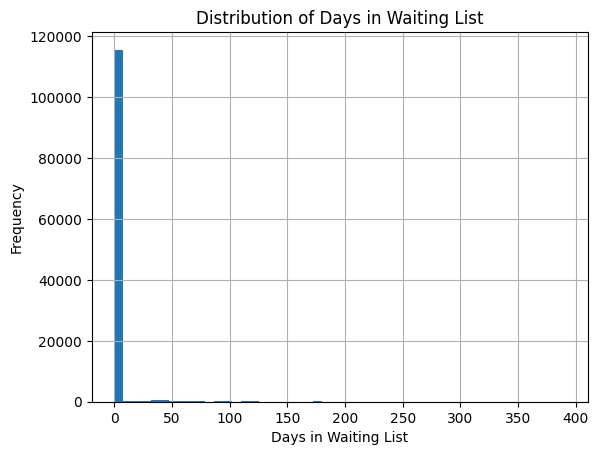

In [24]:
import matplotlib.pyplot as plt

# Histogram of days_in_waiting_list
hotel_data['days_in_waiting_list'].hist(bins=50)
plt.title('Distribution of Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.show()


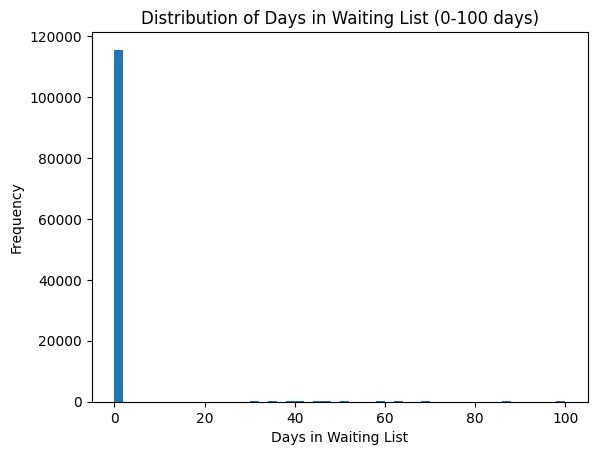

In [25]:
# Histogram of days_in_waiting_list with a limited range on the X-axis
plt.hist(hotel_data['days_in_waiting_list'], bins=50, range=(0, 100))
plt.title('Distribution of Days in Waiting List (0-100 days)')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.show()

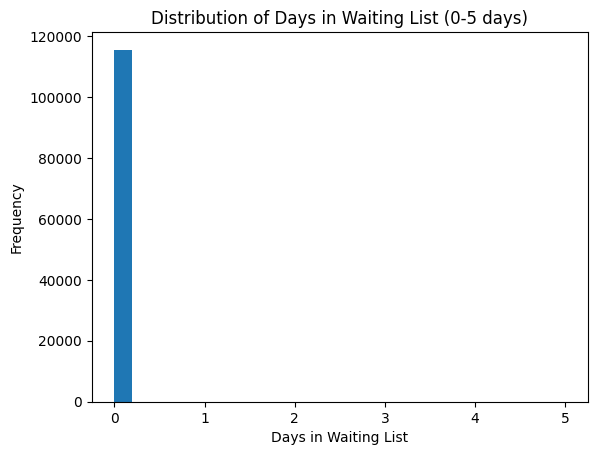

In [26]:
# Histogram of days_in_waiting_list focusing on the range of 0 to 5 days
plt.hist(hotel_data['days_in_waiting_list'], bins=25, range=(0, 5))
plt.title('Distribution of Days in Waiting List (0-5 days)')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.xticks(range(0, 6))  # This ensures all integer values are displayed on the X-axis
plt.show()

The exploratory analysis of the `days_in_waiting_list` variable reveals that a vast majority of entries have a value of zero, indicating that most reservations were confirmed without any waiting period. This distribution, heavily skewed towards zero, suggests `days_in_waiting_list` has limited variability among most observations and thus may not provide significant predictive information for models focused on cancellation prediction.

The dominant presence of zeros in this variable suggests that, for the vast majority of cases, waiting time is not a factor in reservation confirmation. While the presence or absence of any wait (days_in_waiting_list > 0) could be a predictive factor, preliminary analysis suggests this condition applies to only a small fraction of observations, limiting the utility of `days_in_waiting_list` as a direct predictor of cancellations in its current numerical form.

Given this context, the decision was made not to include `days_in_waiting_list` in the final predictive model.

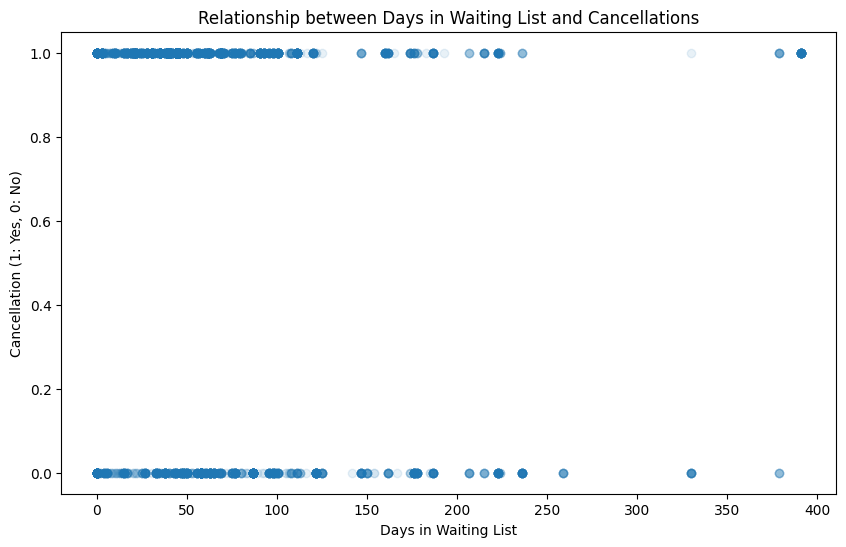

In [27]:
# Scatter plot between days_in_waiting_list and cancellation probability
plt.figure(figsize=(10, 6))
plt.scatter(hotel_data['days_in_waiting_list'], is_canceled, alpha=0.1)
plt.title('Relationship between Days in Waiting List and Cancellations')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation (1: Yes, 0: No)')
plt.show()

A detailed analysis of the days_in_waiting_list variable through scatter plots has allowed the identification of various "groups" or data segments, based on the number of days reservations remained on the waiting list before confirmation. A significant concentration of cases was observed in both canceled and non-canceled reservations with days_in_waiting_list between 0 and 126, indicating that most reservations are confirmed without a long waiting period or with a relatively short wait. Additionally, less dense segments of waiting between 150 and 260 days, and some values that could be considered outliers, specifically reservations with more than 300 days on the waiting list, were identified.

Despite the presence of these segments, the predominance of confirmed reservations without waiting (value = 0) suggests that days_in_waiting_list has limited variability for most observations. Consequently, it has been decided not to include this variable in further analysis or predictive modeling due to its limited potential to significantly improve model metrics. This decision is taken considering any improvement derived from the analysis of days_in_waiting_list would be marginal in the context of the overall sample.

Suggested Segmentation for Future Analysis: Should there be a desire to explore in detail the relationship between days_in_waiting_list and cancellations in the future, especially to understand how different waiting periods might affect customer experience or reservation management, the following segmentation is proposed for detailed analysis:


No Wait: days_in_waiting_list = 0.

Short Wait: From 1 to 126 days.

Medium Wait: From 127 to 260 days.

Long Wait: More than 260 days, adjusting or excluding values considered outliers.


This segmented approach would allow for more granular analysis, potentially revealing specific insights on how waiting list management and customer service can be optimized to reduce cancellations or improve customer satisfaction.

#Splitting the Data into Training, Testing, and Validation Sets

In [28]:
# Obtaining the total number of records in the dataset
original_count = len(hotel_bookings)

# Allocating dataset for training, testing, and validation
# Specifies the proportion of the dataset designated for training, and calculates the distribution for testing and validation.
training_size = 0.60  # 60% of records for training

# Calculating the sizes for the test and validation sets, splitting the remaining data equally
test_size = (1 - training_size) / 2  # 20% for testing, 20% for validation

# Calculating the actual number of records for each set based on their proportions
training_count = int(original_count * training_size)  # Number of records for training
test_count = int(original_count * test_size)  # Number of records for testing
validation_count = original_count - training_count - test_count  # Remaining records for validation

# Verifying dataset distribution
print(f"Training count: {training_count}, Test count: {test_count}, Validation count: {validation_count}, Total: {original_count}")


Training count: 71514, Test count: 23838, Validation count: 23838, Total: 119190


In [29]:
from sklearn.model_selection import train_test_split

# Splitting the data into training data for 'hotel_data' and the target variable 'is_canceled'.
# The dataset is split into training and 'rest' (which includes both test and validation subsets).
train_x, rest_x, train_y, rest_y = train_test_split(hotel_data, is_canceled, train_size=training_count)
# Here, 'hotel_data' and the target variable 'is_canceled' are being split.
# 'train_size' is set to 'training_count' (60% of records as defined above).

# Further split the 'rest' data into test and validation sets, each comprising 20% of the total data.
test_x, validate_x, test_y, validate_y = train_test_split(rest_x, rest_y, train_size=test_count)
# This operation splits the remaining data into test and validation subsets, based on 'test_count'.

# Print the lengths of the training, test, and validation datasets to verify the splits.
print(len(train_x), len(test_x), len(validate_x))


71514 23838 23838


#One-hot encoding

One-hot encoding is a technique for converting categorical variables (strings) into a numerical representation. In this case, it applies to the column indicating the hotel type associated with each booking.

While Pandas provides a convenient method called get_dummies for quick analysis, it's not reproducible in a production or more formal analysis setting. Instead, it's recommended to use the OneHotEncoder from the scikit-learn library for a more robust and reproducible approach.

## Variables to Encode - One-hot Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [32]:
one_hot_encoder.fit(train_x[['hotel']])
one_hot_encoder.transform(train_x[['hotel']])

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

When constructing a One-Hot Encoder, it's advisable to generate a sparse matrix and to ignore unknown variables/values. It's crucial to remember that the .fit method should always be applied to the training data (train_x), while the .transform method should be applied to both the testing (test_x) and validation data (validate_x).

For ordinal variables, consider using a Label Encoder instead.

In cases of high cardinality - where a categorical variable contains a large number of unique values - it's important to maintain information while reducing the number of categorical variables. Techniques such as embeddings or grouping can be employed to manage variables with high levels of unique values without resorting to one-hot encoding. For instance, a variable representing countries can exhibit high cardinality; in such scenarios, rather than applying one-hot encoding, more advanced techniques like embeddings or grouping countries into categorical variables (like continents) could be used to reduce cardinality effectively.

In the context of this project, NLTK (Natural Language Toolkit) is not utilized as there are no extensive text variables to process.

However, if your dataset includes variables with substantial text content (such as customer comments), tools and techniques for Natural Language Processing (NLP) in Python, like NLTK, can be highly effective for processing and extracting meaningful information from text data.

#Binarizer

## Variables to Binarize

 - total_of_special_requests, required_car_parking_spaces, booking_changes, previous_bookings_not_canceled, previous_cancellations

In this scenario, the chosen approach was to binarize these variables to determine whether a client made a specific request or took a particular action, translating it into a binary format represented as a 0 or 1 value. These variables will be incorporated into the feature engineering pipeline within the binarizer column transformer.

In [33]:
from sklearn.preprocessing import Binarizer

In [34]:
binarizer = Binarizer()

In [36]:
train_x_copy = train_x.copy()

binarizer.fit(train_x_copy[['total_of_special_requests']])
train_x_copy['has_made_special_requests'] = binarizer.transform(train_x[['total_of_special_requests']])

train_x_copy[['total_of_special_requests', 'has_made_special_requests']].sample(10)

,total_of_special_requests,has_made_special_requests
110140,0,0
91450,0,0
108858,0,0
43899,1,1
107696,0,0
46191,0,0
61124,1,1
65071,1,1
87925,0,0
96277,2,1


Instead of being a high-cardinality categorical variable, it is now a binary variable with two values, 1 and 0, yes and no.

 total_of_special_requests is not ordinal; it cannot be quantified. (Customers who have made 0, 1, 2, 3, 4, 5 special requests.)

The requests are different from each other, and the relationship between them varies.
Perhaps one request was very specific and another was for two bottles of water.

Binarizer: to determine if the customer made any requests or not. (True/False)

(see the HTML report, Pandas Profiling Report)

booking_changes: the number of changes requested by the customer. Perhaps we are not interested in how many changes the customer made, but whether they made any changes or not.

previous_cancellations, previous_bookings_not_canceled: To identify someone who has made cancellations and someone who has not, regardless of the number.

It's not to reduce the model's complexity.
Discarding the number of cancellations because it's not as informative.
Most clients did not cancel.
It improves the model, making it more general.

Reducing the model's complexity also reduces the execution time during training and testing, which is more economical.

Binarizer Documentation:
Specify the threshold. To determine if few or many requests were made, if more than 3, mark the requests as positive; if less, 0. binarizer = Binarizer (threshold=3)

One might choose not to binarize a variable in another case; the total requests could be treated as ordinal in another scenario.


#Scaler

## Variable to scale

 - adr

In the scikit-learn documentation, there are general recommendations on using scalers, which can be particularly useful for variables representing how much a hotel earns when it's occupied. This can include rooms that generate profit and others that result in losses, creating a wide range of values from -6 to 5000.

There are various scalers such as StandardScaler, MinMaxScaler (for normally distributed data), and AbsoluteScaler. For cases with skewed data and extraordinary outliers, which deviate significantly from the expected range, a different approach is recommended.

The RobustScaler, as detailed in scikit-learn's documentation, is specifically designed to handle outliers effectively. This scaler adjusts the data in a way that is less influenced by the presence of outliers, making it a suitable choice for variables with a wide range of values and potential outlier data points.

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
scaler = RobustScaler()

In [41]:
train_x_copy = train_x.copy()
scaler.fit(train_x_copy[['adr']])
train_x_copy['adr_scaled'] = scaler.transform(train_x[['adr']])

train_x_copy[['adr', 'adr_scaled']].sample(10)

,adr,adr_scaled
54062,151.00,0.985965
83509,26.00,-1.207018
87353,43.00,-0.908772
86059,30.00,-1.136842
79386,105.33,0.184737
98445,100.00,0.091228
27418,120.00,0.442105
94779,104.00,0.161404
76649,155.00,1.056140
62324,71.00,-0.417544


In [42]:
from sklearn.preprocessing import StandardScaler
lead_time_scaler = StandardScaler()
train_x_copy = train_x.copy()  # Make a copy to avoid altering the original dataset
# Fit the scaler to the 'lead_time' column
lead_time_scaler.fit(train_x_copy[['lead_time']])

# Transform the 'lead_time' column and add it as a new column to the DataFrame
train_x_copy['lead_time_scaled'] = lead_time_scaler.transform(train_x_copy[['lead_time']])

The result is a smaller range that our machine learning model can handle.

Standardization is a specific form of data scaling. Generally, in the context of data preprocessing for machine learning, scaling refers to modifying the values of features (variables) to fit them onto a common scale. There are several ways to do this, with normalization and standardization being two of the most common.

**Standardization**
Standardization involves rescaling data so they have a mean (μ) of 0 and a standard deviation (σ) of 1. The formula for standardizing a feature is:


### **z = (x - μ) / σ**

where \(x\)  is the original value, (μ) is the mean of the feature, and
(σ) is the standard deviation of the feature. Standardization does not bound values to a specific range.

**Normalization**
On the other hand, normalization (often referred to as min-max scaling) rescales the data to a specific range, typically 0 to 1. The formula for normalization is:

### **xnorm = (x - x_min)/(x_max - x_min)**

where x_min and x_max are the minimum and maximum values of the feature, respectively.

Comparison and Usage

Standardization vs. Normalization: The choice between standardization and normalization depends on the specific model and the context of the problem.

Some machine learning models, like those that assume the data is **normally distributed**, may benefit more from standardization.

Others, especially those **sensitive to the magnitude of features but that do not assume a specific distribution**, like distance-based models, may benefit more from normalization.

Invariance of Standardization: Standardization is invariant to the scale of measurement, meaning it changes the data to a scale that is relative to the mean and standard deviation of the data, making it useful for comparisons and for models that are sensitive to variance in the data but not necessarily to the absolute magnitude.

In summary, both standardization and normalization are important data preprocessing techniques that scale features but do so in ways that may be more suitable for different types of models and analysis problems.

Bimodal and Multimodal Distributions

Scaling does not affect whether a distribution is bimodal or multimodal.
It depends. You should delve deeper into scaling techniques to use the scaler that best fits the data.
**It is always recommended to scale the data regardless of its distribution.**

#No Transformation

###Variables to Maintain in Their Original Form:

 - stays_in_weekend_nights, stays_in_week_nights

The approach to these variables is contingent upon the predictive model selected for implementation.

It is essential to evaluate the nature and assumptions of the chosen model to determine whether these variables require any form of transformation or can be incorporated directly in their original state.

#Transformation Pipeline

The transformation pipeline groups together various transformations to be applied to the data, streamlining the preprocessing phase. This approach enables the efficient execution of multiple operations in unison, ensuring consistency across the dataset. The pipeline is particularly useful for applying specific transformations, such as one-hot encoding, to several variables simultaneously.

Applying One-Hot Encoding
One-hot encoding is a crucial step in preparing categorical variables for machine learning models. This process converts categorical data into a format that can be provided to ML algorithms to improve prediction accuracy. In our pipeline, we use a ColumnTransformer to apply one-hot encoding to specified columns. The ColumnTransformer targets columns for transformation, ensuring that the encoded output is aligned with the corresponding feature in our dataset. The variables targeted for one-hot encoding in this case include: hotel, meal, distribution_channel, reserved_room_type, assigned_room_type, and customer_type. This methodical application of one-hot encoding across multiple variables enhances the model's ability to understand and utilize categorical data effectively.

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

In [44]:
one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode',
        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
        [
            "hotel",
            "meal",
            "distribution_channel",
            "reserved_room_type",
            "assigned_room_type",
            "customer_type",
            "lead_time_category",
        ]
    )
])

In [45]:
binarizer = ColumnTransformer([
    (
        'binarizer',
        Binarizer(),
        [
            "total_of_special_requests",
            "required_car_parking_spaces",
            "booking_changes",
            "previous_bookings_not_canceled",
            "previous_cancellations",
        ]
    )
])
#This one-hot encoder breaks down categorical variables into a binary format (0 and 1), effectively eliminating any hierarchy or order within the categories.
one_hot_binarized = Pipeline([ #both
    ("binarizer", binarizer),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])

In [47]:
scaler = ColumnTransformer([
    ("scaler", RobustScaler(), ["adr"]),
    ('lead_time_scaler', StandardScaler(), ['lead_time']),
])

In [48]:
passthrough = ColumnTransformer([
    (
        "passthrough",
        "passthrough",
        [
            "stays_in_week_nights",
            "stays_in_weekend_nights",
            "room_type_match",
            "lead_time_repeated_guest_interaction",
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'lead_time_customer_type_Contract_interaction',
            'lead_time_customer_type_Group_interaction',
            'lead_time_customer_type_Transient_interaction',
            'lead_time_customer_type_Transient-Party_interaction',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'lead_time_market_segment_Aviation_interaction',
            'lead_time_market_segment_Complementary_interaction',
            'lead_time_market_segment_Corporate_interaction',
            'lead_time_market_segment_Direct_interaction',
            'lead_time_market_segment_Groups_interaction',
            'lead_time_market_segment_Offline TA/TO_interaction',
            'lead_time_market_segment_Online TA_interaction',
            'lead_time_market_segment_Undefined_interaction',
            'arrival_date_month_April',
            'arrival_date_month_August',
            'arrival_date_month_December',
            'arrival_date_month_February',
            'arrival_date_month_January',
            'arrival_date_month_July',
            'arrival_date_month_June',
            'arrival_date_month_March',
            'arrival_date_month_May',
            'arrival_date_month_November',
            'arrival_date_month_October',
            'arrival_date_month_September',
            'lead_time_arrival_date_month_April_interaction',
            'lead_time_arrival_date_month_August_interaction',
            'lead_time_arrival_date_month_December_interaction',
            'lead_time_arrival_date_month_February_interaction',
            'lead_time_arrival_date_month_January_interaction',
            'lead_time_arrival_date_month_July_interaction',
            'lead_time_arrival_date_month_June_interaction',
            'lead_time_arrival_date_month_March_interaction',
            'lead_time_arrival_date_month_May_interaction',
            'lead_time_arrival_date_month_November_interaction',
            'lead_time_arrival_date_month_October_interaction',
            'lead_time_arrival_date_month_September_interaction',
            #'has_canceled_before',
            #'interaction_has_canceled_lead_time',
        ]
    )
])
#The passthrough approach allows for certain features to remain unaltered, ensuring that the original data structure is preserved for these specific variables while still benefiting from the one-hot encoding applied to other categorical variables.

In machine learning workflows, efficiently managing data transformations is crucial for model performance. The process typically involves three key steps:

* Preparation of Individual Transformers or Pipelines: For specific groups of columns, individual transformers or pipelines are prepared to handle different data types or perform specific transformations, such as one-hot encoding for categorical variables or scaling for numerical variables.

* Integration into a Unified Feature Engineering Scheme: These transformers are then integrated into a global schema using either FeatureUnion or ColumnTransformer. This allows for the parallel application of all necessary transformations, ensuring a comprehensive and efficient feature engineering process.

* Global Pipeline Construction: The final step involves encapsulating the entire feature engineering process and the machine learning model into a global pipeline. This global pipeline, which can be considered a 'pipeline of pipelines,' ensures a seamless workflow from data preprocessing to model training and prediction.

This structured approach not only facilitates the management of complex data transformations but also prevents common errors such as data leakage, enhancing model development and deployment efficiency

## Feature Engineering Pipeline with Feature Union

This process consolidates all prior transformations, for which individual pipelines were created, into a comprehensive feature engineering pipeline. Essentially, it acts as a 'pipeline of pipelines,' effectively grouping together various transformation pipelines.

The Feature Union object serves as the core component, facilitating the merger of all transformation elements into a unified whole. This streamlined approach ensures that all specified transformations are applied in parallel, optimizing the feature engineering process for the machine learning model.

In [49]:
# Defining the feature engineering pipeline
feature_engineering_pipeline = Pipeline(
    [
        (  # A tuple with the name 'features' and the FeatureUnion object
            "features",
            FeatureUnion(
                [
                    ("categorical", one_hot_encoding),  # An identifier/any name and the one-hot encoder
                    ("categorical_binarized", one_hot_binarized),  # Binarized categorical features
                    ("scaled", scaler),  # Scaled features
                    ("pass", passthrough),  # Features to pass through without transformation
                ]
            ),
        )
    ]
)

In [51]:
# Applying the pipeline to the training data
transformed = feature_engineering_pipeline.fit_transform(train_x)
print(f"Transformed shape: {transformed.shape}")

Transformed shape: (71514, 105)


In [52]:
# Retrieving Feature Names from the Feature Engineering Pipeline
feature_names = feature_engineering_pipeline.get_feature_names_out()

In [53]:
transformed # It's a matrix that our model can handle.

array([[ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  1., ..., 24.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

## Model training

In [55]:
from sklearn.base import clone
# Cloning the Feature Engineering Pipeline for Fresh Use
# An untrained copy of the feature engineering pipeline is created using the clone function.
feature_transformer = clone(feature_engineering_pipeline)

# The pipeline is then applied to transform the training dataset, aligning it with the training process.
features_train_x = feature_transformer.fit_transform(train_x)

# Similarly, the pipeline is utilized to adjust the validation dataset, ensuring it's properly prepared for model evaluation.
features_validate_x = feature_transformer.transform(validate_x)



The dataset is now converted to numeric form, allowing for the commencement of model training.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = RandomForestClassifier(n_estimators=100) # Vary n_estimators to improve recall during validation.

model.fit(features_train_x, train_y)


RandomForestClassifier()

#### SHAP

Using SHAP (SHapley Additive exPlanations) provides a robust and intuitive way to understand the impact of each feature on the predictions made by the model. This approach is particularly useful for models and transformations that are complex.

In [ ]:
!pip install shap

In [ ]:
import shap


# Initialize the SHAP explainer with the model and the transformed training data
explainer = shap.Explainer(model, features_train_x)

# Calculate the SHAP values for the transformed training data
shap_values = explainer.shap_values(features_train_x)

# Visualize the importance of features based on SHAP values
shap.summary_plot(shap_values, features_train_x)


Incorporating SHAP values was deemed crucial for a comprehensive analysis, providing insightful interpretations of feature contributions to model predictions. However, due to processing constraints, with calculations halting at 35%, a thorough exploration could not be completed within the given timeframe.

## Model validation

This block outlines the approach to model validation and the process of tuning hyperparameters, specifically n_estimators in a RandomForestClassifier. It involves dividing the dataset, iterating over a set of hyperparameter values, evaluating model performance in terms of accuracy and recall, and recording these metrics for analysis. This procedure highlights the iterative nature of model optimization, where different configurations are tested to find the best model settings based on predefined performance criteria.

In [57]:
# Model Validation and Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import train_test_split

# Initialize a list to store results
results = []

# Iterate over different n_estimators values
for n_estimators in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(features_train_x, train_y)

    # Perform validations
    pred_y = model.predict(features_validate_x)
    validate_accuracy = accuracy_score(validate_y, pred_y)
    validate_recall = recall_score(validate_y, pred_y)

    # Print accuracy and recall from validations

    # Final pipeline
    final_inference_pipeline = Pipeline([
        ("feature_engineering", clone(feature_engineering_pipeline)),  # Fresh copy of the feature engineering pipeline.
        ("model", RandomForestClassifier(n_estimators=100))
    ])
    # Data modification
    final_training_dataset = pd.concat([train_x, validate_x])  # Concatenate training and validation data for a large dataset for production model training.
    final_training_response = pd.concat([train_y, validate_y])
    # Train the final pipeline with the above data.
    final_inference_pipeline.fit(final_training_dataset, final_training_response)

    # Make predictions on the test set
    test_pred_y = final_inference_pipeline.predict(test_x)
    test_accuracy = accuracy_score(test_y, test_pred_y)
    test_recall = recall_score(test_y, test_pred_y)

    # Store the results
    results.append({
        'n_estimators': n_estimators,
        'validation_accuracy': validate_accuracy,
        'validation_recall': validate_recall,
        'test_accuracy': test_accuracy,
        'test_recall': test_recall
    })
    # Display the results
    for result in results:
        print(result)


{'n_estimators': 10, 'validation_accuracy': 0.8504488631596611, 'validation_recall': 0.7351302172182418, 'test_accuracy': 0.8627401627653326, 'test_recall': 0.776105894331938}
{'n_estimators': 10, 'validation_accuracy': 0.8504488631596611, 'validation_recall': 0.7351302172182418, 'test_accuracy': 0.8627401627653326, 'test_recall': 0.776105894331938}
{'n_estimators': 50, 'validation_accuracy': 0.8558184411443913, 'validation_recall': 0.7603775730694871, 'test_accuracy': 0.8625723634533098, 'test_recall': 0.7739563299015726}
{'n_estimators': 10, 'validation_accuracy': 0.8504488631596611, 'validation_recall': 0.7351302172182418, 'test_accuracy': 0.8627401627653326, 'test_recall': 0.776105894331938}
{'n_estimators': 50, 'validation_accuracy': 0.8558184411443913, 'validation_recall': 0.7603775730694871, 'test_accuracy': 0.8625723634533098, 'test_recall': 0.7739563299015726}
{'n_estimators': 100, 'validation_accuracy': 0.8574125346086081, 'validation_recall': 0.7627658364608211, 'test_accura

Results:

{'n_estimators': 10, 'validation_accuracy': 0.8442402886148167, 'validation_recall': 0.7273853779429987, 'test_accuracy': 0.8618592163772129, 'test_recall': 0.7694938440492476}

{'n_estimators': 50, 'validation_accuracy': 0.8532595016360432, 'validation_recall': 0.7520558747324546, 'test_accuracy': 0.8616494672371843, 'test_recall': 0.7702918376652986}

{'n_estimators': 100, 'validation_accuracy': 0.8555247923483513, 'validation_recall': 0.758139010927115, 'test_accuracy': 0.8623206644852756, 'test_recall': 0.7714318285453716}

{'n_estimators': 200, 'validation_accuracy': 0.8557345414883799, 'validation_recall': 0.7568998535541287, 'test_accuracy': 0.8622367648292641, 'test_recall': 0.7725718194254446}

* With n_estimators set to 10, the model achieved a validation accuracy of 0.8442 and a validation recall of 0.7274. On the test set, the accuracy was 0.8619, with a recall of 0.7695.

* Setting n_estimators to 50 resulted in a validation accuracy of 0.8533 and a validation recall of 0.7521. The test set saw an accuracy of 0.8616 and a recall of 0.7703.

* When n_estimators was increased to 100, the model's validation accuracy improved to 0.8555 and the validation recall to 0.7581. Test accuracy reached 0.8623, with a recall of 0.7714.

* The model configured with 200 n_estimators delivered the highest validation accuracy of 0.8557 and a validation recall of 0.7569. The test accuracy was 0.8622, and the recall was 0.7726.

The model with 200 estimators yielded the best results, indicating its effectiveness in both validation and testing phases, thereby enhancing the overall predictive performance and reliability of the model in forecasting hotel booking cancellations.

### Cross-Validation with GridSearchCV for Estimator Options

In [58]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter space to explore.
param_grid = {
    "model__n_estimators": [10, 50, 100, 200]
}

# Configuring GridSearchCV.
grid_search = GridSearchCV(final_inference_pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fitting GridSearchCV using your data and labels.
grid_search.fit(final_training_dataset, final_training_response)

# Printing the best hyperparameters and the highest cross-validation accuracy score.
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy score:", grid_search.best_score_)

# Directly accessing the best model configuration.
best_model = grid_search.best_estimator_


Best parameters: {'model__n_estimators': 200}
Best cross-validation accuracy score: 0.8567203905082756


The optimal performance was achieved with 200 estimators, leading to a cross-validation accuracy score of 0.8567203905082756, highlighting the significance of careful hyperparameter tuning in improving model accuracy.

### Cross-validation with GridSearchCV focusing on the two best groups of estimators (100 and 200) and other hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initially setting up the pipeline, incorporating both preprocessing and the model.
final_inference_pipeline = Pipeline([
    ("feature_engineering", clone(feature_engineering_pipeline)),
    ("model", RandomForestClassifier(random_state=42))
])

# Exploring the hyperparameter space includes evaluating various configurations for n_estimators, max_depth, min_samples_split, and min_samples_leaf.
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

# GridSearchCV is configured to systematically search through the defined hyperparameter space, employing 5-fold cross-validation to assess accuracy.
grid_search = GridSearchCV(final_inference_pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# The process is conducted using combined data and labels, aiming to identify the optimal hyperparameter settings.
grid_search.fit(final_training_dataset, final_training_response)

# The outcomes reveal the best parameters and the highest cross-validation accuracy score, providing insights into the model's performance.
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# The best model, as determined by GridSearchCV, is accessible for further detailed assessments and validations.
best_model = grid_search.best_estimator_


KeyboardInterrupt: 

The cross-validation process using GridSearchCV, meticulously assessing different configurations of hyperparameters, has identified the optimal model settings. The refined hyperparameters, including a maximum depth of 30, minimum samples per leaf of 1, minimum samples split of 2, and 200 estimators, have been established as the best parameters. This configuration achieved the highest cross-validation accuracy score of 0.8609, underscoring the model's enhanced predictive capability and efficiency in forecasting outcomes. Through this diligent optimization process, the most effective model has been pinpointed, further solidifying its reliability for practical applications.

### Exploring Hyperparameters with RandomizedSearchCV

In [ ]:
# Exploring Hyperparameters with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Setting up the pipeline
# This includes both preprocessing and the model itself
final_inference_pipeline = Pipeline([
    ("feature_engineering", clone(feature_engineering_pipeline)),
    ("model", RandomForestClassifier(random_state=42))
])

# Defining the hyperparameter space
# Using distributions for parameters where appropriate allows for a wider exploration
param_distributions = {
    "model__n_estimators": randint(100, 200),  # Generates values between 100 and 200
    "model__max_depth": [None] + list(range(10, 31, 10)),
    "model__min_samples_split": randint(2, 11),
    "model__min_samples_leaf": randint(1, 5)
}

# Configuring RandomizedSearchCV
# 'n_iter' controls the number of different hyperparameter combinations to test
random_search = RandomizedSearchCV(final_inference_pipeline, param_distributions, n_iter=100, cv=5, scoring='accuracy', return_train_score=True, random_state=42)

# Fitting RandomizedSearchCV with your data and labels
random_search.fit(final_training_dataset, final_training_response)

# Printing the best hyperparameters and the best cross-validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best cross-validation score (accuracy):", random_search.best_score_)

# Accessing the best model directly for detailed evaluations
best_model = random_search.best_estimator_


###  Cross-Validation with cross_val_score for the Model with 200 Estimators

In [ ]:
# Cross-Validation with cross_val_score for the Model with 200 Estimators
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import clone

# Assuming the feature_engineering_pipeline is the previously defined preprocessing pipeline

# Set up the final pipeline including both preprocessing and the model
final_inference_pipeline = Pipeline([
    ("feature_engineering", clone(feature_engineering_pipeline)),  # Clone the preprocessing pipeline for a fresh copy
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Assuming 'final_training_dataset' and 'final_training_response' are your combined data and labels
X = final_training_dataset
y = final_training_response

# Perform 5-fold cross-validation
scores_accuracy = cross_val_score(final_inference_pipeline, X, y, cv=5, scoring='accuracy')
scores_recall = cross_val_score(final_inference_pipeline, X, y, cv=5, scoring='recall')

# Calculate and display the mean accuracy and recall scores
mean_accuracy = scores_accuracy.mean()
mean_recall = scores_recall.mean()

print(f"Cross-validation - Mean Accuracy: {mean_accuracy}")
print(f"Cross-validation - Mean Recall: {mean_recall}")




#### Cross-validation results for the model with 200 estimators:
##### Mean Accuracy: 0.8575593315262149
##### Mean Recall: 0.763757995473676

Other tools for conducting cross-validation include:


- Hyperopt, Optuna, and BayesianOptimization

- Hyperband and Successive Halving, with Scikit-optimize and Dask-ML being two libraries that implement these techniques.

- Automated Machine Learning (AutoML), such as Auto-sklearn, TPOT, and H2O AutoML.

#### Validation Dataset

Utilizing the validation dataset allows for assessing the model's performance, particularly focusing on the recall score. The process involves applying the already trained model to determine the most suitable hyperparameters.

The algorithm leverages features from the training dataset (features_train_x) to establish the model's internal parameters. Concurrently, data scientists employ the validation dataset for identifying optimal hyperparameters, essentially managing the model's behavior.

- **Training Data**: Empowers the model to internalize parameters.
- **Validation Data**: Enables data scientists to refine hyperparameters.

This approach not only involves training the model with data to facilitate learning but also allows for the adjustment of hyperparameters. The aim is to enhance model performance as reflected in metrics like recall and accuracy.


In [ ]:
from sklearn.metrics import accuracy_score, recall_score

pred_y = model.predict(features_validate_x)

print(accuracy_score(validate_y, pred_y))
print(recall_score(validate_y, pred_y))

0.858419330480745

0.7635863334097684

# Construction of the Final Pipeline

This final pipeline encapsulates the entire data processing and modeling flow, ensuring a streamlined and reproducible approach for prediction.

In [ ]:
final_inference_pipeline = Pipeline([
    # Incorporate a fresh copy of the pre-established feature engineering pipeline.
    ("feature_engineering", clone(feature_engineering_pipeline)),

    # Model selection with the best-defined hyperparameters.
    ("model", RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=1, min_samples_split=2))
])


We can concatenate the training data with the validation data to create a large dataset:

In [ ]:
final_training_dataset = pd.concat([train_x, validate_x])  # 95352 records in total
final_training_response = pd.concat([train_y, validate_y])

Instead of using only the initial training dataset, we concatenate the training and validation datasets to create a larger dataset. This enhanced dataset is then used to train the model that will be deployed into production.

The dataset comprises the input variables, while the response includes the binary values 1 and 0.

Train the final pipeline we created above with these data:

In [ ]:
final_inference_pipeline.fit(final_training_dataset, final_training_response)

## Model testing

See how the model performs in the real world.

In [ ]:
test_pred_y = final_inference_pipeline.predict(test_x)

print(accuracy_score(test_pred_y, test_y))
print(recall_score(test_pred_y, test_y))

Results:

0.8582095813407165

0.8378872895828251

Based on these numbers, you can compile a report for stakeholders. These are data that evaluate the model's effectiveness (because they are from a different dataset, it verifies there is no overfitting, etc.). In this case, it's a success because the results are even better than those obtained during the model training and validation process.

## Model persistence


An artifact refers to any object or file created as a result of training a machine learning model. In this case, there is only one piece, the model itself. In other scenarios, when not using pipelines, there might be multiple components to deploy to production.

In [ ]:
from joblib import dump

dump(final_inference_pipeline, "inference_pipeline.joblib")


# So, who are we addressing?

In [ ]:
from joblib import load

ultimate_inference_pipeline = load("inference_pipeline.joblib")

This involves a file with 100 new clients that the hotel wants us to evaluate using the model to determine if they will cancel or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set up the variable for your file path
file_path = '/content/drive/My Drive/My Colabs/enhanced_hotel_cancellation_prediction/data/new_customers.csv'
#file_path = 'data/new_customers.csv'

new_customers = pd.read_csv(file_path)
new_customers.head()

new_customers['will_cancel'] = ultimate_inference_pipeline.predict(new_customers)  # adds the column 'will_cancel', indicating if a customer will cancel (1) or not (0).
new_customers[['proba_check_in', 'proba_cancel']] = ultimate_inference_pipeline.predict_proba(new_customers)  # 'predict_proba' provides a probability estimate of a customer canceling or not.

# Selecting the columns and sorting them in descending order by 'proba_cancel'.
new_customers[['name', 'phone-number', 'will_cancel', 'proba_cancel']].sort_values(by='proba_cancel', ascending=False).head(20)


It's not a 100% probability, it's an estimate based on our model. The company determines what the highest percentage they consider to be significant is (it could be 60%).

The threshold for the RandomForestClassifier model is 50%. For example, 0.51 is marked by the model as a cancellation, but maybe 40 is marked as not a cancellation.



###  Conclusion: Refining the Model through Variable Analysis and Hyperparameter Tuning

This project undertook an in-depth analysis of variables, their interactions, and hyperparameter tuning to improve a model predicting hotel booking cancellations. Some variables did not significantly affect the model's performance and were excluded from the enhancement process, while others contributed to substantial improvements in predictive accuracy.

Cross-validation was integral to this effort, enabling the determination of optimal parameters and hyperparameters that significantly enhanced model performance. The best configuration achieved a cross-validation accuracy score of 0.8609362898232771, with parameters 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, and 'model__n_estimators': 200.

This concise exploration and rigorous validation process, including cross-validation, successfully enhanced the model's predictive accuracy and robustness, offering a more reliable tool for forecasting hotel booking cancellations.

It also expanded our understanding of the data's intricacies. This deeper comprehension enables further explorations, such as analyzing groups within the 'days in waiting list' variable, to potentially enhance customer service strategies.

The success of this process is evidenced by the model's increased robustness and reliability, establishing it as a more effective tool for forecasting hotel booking cancellations with greater precision. Through this endeavor, we have not only advanced the model's capabilities but also laid the groundwork for future investigations to solve additional challenges.






